In [1]:

import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
# from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000) # I just assume 1000 is better 
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_data().ravel())) 
- 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, 
memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males

     |████████████████████████████████| 10.0 MB 4.4 MB/s 


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 838991872 of 905208634 bytes (92.7%,    0.6s remaining) ...done. (9 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  app.launch_new_instance()


1000 regions found in this atlas


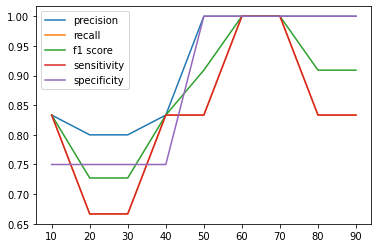

In [2]:
def plot_each_n_rois(i):
  train_input = input_variables[:i]
  train_output = output_variable[:i]

  test_input = input_variables[90:]
  test_output = output_variable[90:]

  Logmodel = LogisticRegression(penalty='l2',C=1.0).fit(train_input, train_output)
  # log_predict_train = Logmodel.predict(train_input)
  log_predict_output = Logmodel.predict(test_input)

  # (precision, recall, fscore, support) = precision_recall_fscore_support(test_output, log_predict_output, average='binary',pos_label=0)
  test_report = classification_report(test_output, log_predict_output, labels=[0,1], output_dict=True)
  # # train_report = classification_report(train_output, log_predict_train)
  # print(test_report)
  test_precision = test_report['0']['precision']
  test_recall = test_report['0']['recall']
  test_f1 = test_report['0']['f1-score']
  test_sensitivity = test_report['0']['recall'] ########### Here I let class 0 be positive class and 1 be negative class #########
  test_specificity = test_report['1']['recall']
  # test_accuracy = np.sum(log_predict_output == test_output)/len(test_output)
  # train_accuracy = np.sum(log_predict_train == train_output)/len(train_output)

  return i, test_precision, test_recall, test_f1, test_sensitivity, test_specificity
  # return i, precision, recall, fscore, test_sensitivity, test_specificity

x_list = [] ### n_rois
# train_y_list = [] ### accuracy
# test_y_list = []

precision_list = []
recall_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
for i in range (10,100,10):
  i, test_precision, test_recall, test_f1, test_sensitivity, test_specificity = plot_each_n_rois(i)

  # print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  # train_y_list.append(train_accuracy)
  # test_y_list.append(test_accuracy)
  precision_list.append(test_precision)
  recall_list.append(test_recall)
  f1_list.append(test_f1)
  sensitivity_list.append(test_sensitivity)
  specificity_list.append(test_specificity)


# print(x_list)
# print(log_y_list)
# print(KNN_y_list)
plt.xticks(x_list)
plt.plot(x_list,precision_list,label='precision')
plt.plot(x_list,recall_list,label='recall')
plt.plot(x_list,f1_list,label='f1 score')
plt.plot(x_list,sensitivity_list,label='sensitivity')
plt.plot(x_list,specificity_list,label='specificity')
# plt.plot(x_list,KNN_y_list,label='KNN')

plt.legend()
plt.show()

 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


100 regions found in this atlas


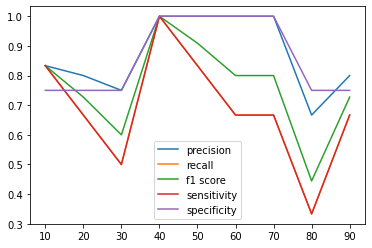

In [4]:
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # I just assume 1000 is better 
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_data().ravel())) 
- 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, 
memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males

x_list = [] ### n_rois
# train_y_list = [] ### accuracy
# test_y_list = []

precision_list = []
recall_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
for i in range (10,100,10):
  i, test_precision, test_recall, test_f1, test_sensitivity, test_specificity = plot_each_n_rois(i)

  # print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  # train_y_list.append(train_accuracy)
  # test_y_list.append(test_accuracy)
  precision_list.append(test_precision)
  recall_list.append(test_recall)
  f1_list.append(test_f1)
  sensitivity_list.append(test_sensitivity)
  specificity_list.append(test_specificity)


# print(x_list)
# print(log_y_list)
# print(KNN_y_list)
plt.xticks(x_list)
plt.plot(x_list,precision_list,label='precision')
plt.plot(x_list,recall_list,label='recall')
plt.plot(x_list,f1_list,label='f1 score')
plt.plot(x_list,sensitivity_list,label='sensitivity')
plt.plot(x_list,specificity_list,label='specificity')
# plt.plot(x_list,KNN_y_list,label='KNN')

plt.legend()
plt.show()